# 1. Setup of Overlay

In [1]:
from pynq import Overlay

from time import sleep
from matplotlib import pyplot as plt
import math
import string
import binascii
from PIL import Image
import numpy as np
import IPython
import ipywidgets as widgets
from ipywidgets import Layout, Box
from IPython.display import Javascript
import os

In [2]:
dsp_proc = Overlay("Overlay/DSPProc_design.bit")

dsp_proc.ip_dict.keys()

dict_keys(['continue_proc', 'datToHost', 'host_datToMem', 'host_memAdd', 'host_memWr', 'rst'])

### Register address and constants

In [3]:
CSRAdd_7DT5        = int("000",2);
sourceMemAdd_7DT5  = int("001",2);
resultMem0Add_7DT5 = int("010",2);
        
period   = 0.02
zero_32  = '00000000000000000000000000000000'
zero_16  = '0000000000000000'
zero_8   = '00000000'


continue_proc = dsp_proc.continue_proc
datToHost     = dsp_proc.datToHost
host_datToMem = dsp_proc.host_datToMem
host_memAdd   = dsp_proc.host_memAdd
host_memWr    = dsp_proc.host_memWr
rst           = dsp_proc.rst

In [4]:
sourceArray_test = [ ["1f","1e","1d","1c","1b","1a","19","18","17","16","15","14","13","12","11","10","0f","0e","0d","0c","0b","0a","09","08","07","06","05","04","03","02","01","00"],      
    ["3f","3e","3d","3c","3b","3a","39","38","37","36","35","34","33","32","31","30","2f","2e","2d","2c","2b","2a","29","28","27","26","25","24","23","22","21","20"],      
    ["5f","5e","5d","5c","5b","5a","59","58","57","56","55","54","53","52","51","50","4f","4e","4d","4c","4b","4a","49","48","47","46","45","44","43","42","41","40"],      
    ["7f","7e","7d","7c","7b","7a","79","78","77","76","75","74","73","72","71","70","6f","6e","6d","6c","6b","6a","69","68","67","66","65","64","63","62","61","60"],      
    ["9f","9e","9d","9c","9b","9a","99","98","97","96","95","94","93","92","91","90","8f","8e","8d","8c","8b","8a","89","88","87","86","85","84","83","82","81","80"],      
    ["bf","be","bd","bc","bb","ba","b9","b8","b7","b6","b5","b4","b3","b2","b1","b0","af","ae","ad","ac","ab","aa","a9","a8","a7","a6","a5","a4","a3","a2","a1","a0"],      
    ["df","de","dd","dc","db","da","d9","d8","d7","d6","d5","d4","d3","d2","d1","d0","cf","ce","cd","cc","cb","ca","c9","c8","c7","c6","c5","c4","c3","c2","c1","c0"],      
    ["ff","fe","fd","fc","fb","fa","f9","f8","f7","f6","f5","f4","f3","f2","f1","f0","ef","ee","ed","ec","eb","ea","e9","e8","e7","e6","e5","e4","e3","e2","e1","e0"],      
    ["1f","1e","1d","1c","1b","1a","19","18","17","16","15","14","13","12","11","10","0f","0e","0d","0c","0b","0a","09","08","07","06","05","04","03","02","01","00"],      
    ["3f","3e","3d","3c","3b","3a","39","38","37","36","35","34","33","32","31","30","2f","2e","2d","2c","2b","2a","29","28","27","26","25","24","23","22","21","20"],      
    ["5f","5e","5d","5c","5b","5a","59","58","57","56","55","54","53","52","51","50","4f","4e","4d","4c","4b","4a","49","48","47","46","45","44","43","42","41","40"],      
    ["7f","7e","7d","7c","7b","7a","79","78","77","76","75","74","73","72","71","70","6f","6e","6d","6c","6b","6a","69","68","67","66","65","64","63","62","61","60"],      
    ["9f","9e","9d","9c","9b","9a","99","98","97","96","95","94","93","92","91","90","8f","8e","8d","8c","8b","8a","89","88","87","86","85","84","83","82","81","80"],      
    ["bf","be","bd","bc","bb","ba","b9","b8","b7","b6","b5","b4","b3","b2","b1","b0","af","ae","ad","ac","ab","aa","a9","a8","a7","a6","a5","a4","a3","a2","a1","a0"],      
    ["df","de","dd","dc","db","da","d9","d8","d7","d6","d5","d4","d3","d2","d1","d0","cf","ce","cd","cc","cb","ca","c9","c8","c7","c6","c5","c4","c3","c2","c1","c0"],      
    ["ff","fe","fd","fc","fb","fa","f9","f8","f7","f6","f5","f4","f3","f2","f1","f0","ef","ee","ed","ec","eb","ea","e9","e8","e7","e6","e5","e4","e3","e2","e1","e0"],      
    ["1f","1e","1d","1c","1b","1a","19","18","17","16","15","14","13","12","11","10","0f","0e","0d","0c","0b","0a","09","08","07","06","05","04","03","02","01","00"],      
    ["3f","3e","3d","3c","3b","3a","39","38","37","36","35","34","33","32","31","30","2f","2e","2d","2c","2b","2a","29","28","27","26","25","24","23","22","21","20"],      
    ["5f","5e","5d","5c","5b","5a","59","58","57","56","55","54","53","52","51","50","4f","4e","4d","4c","4b","4a","49","48","47","46","45","44","43","42","41","40"],      
    ["7f","7e","7d","7c","7b","7a","79","78","77","76","75","74","73","72","71","70","6f","6e","6d","6c","6b","6a","69","68","67","66","65","64","63","62","61","60"],      
    ["9f","9e","9d","9c","9b","9a","99","98","97","96","95","94","93","92","91","90","8f","8e","8d","8c","8b","8a","89","88","87","86","85","84","83","82","81","80"],      
    ["bf","be","bd","bc","bb","ba","b9","b8","b7","b6","b5","b4","b3","b2","b1","b0","af","ae","ad","ac","ab","aa","a9","a8","a7","a6","a5","a4","a3","a2","a1","a0"],      
    ["df","de","dd","dc","db","da","d9","d8","d7","d6","d5","d4","d3","d2","d1","d0","cf","ce","cd","cc","cb","ca","c9","c8","c7","c6","c5","c4","c3","c2","c1","c0"],      
    ["ff","fe","fd","fc","fb","fa","f9","f8","f7","f6","f5","f4","f3","f2","f1","f0","ef","ee","ed","ec","eb","ea","e9","e8","e7","e6","e5","e4","e3","e2","e1","e0"],      
    ["1f","1e","1d","1c","1b","1a","19","18","17","16","15","14","13","12","11","10","0f","0e","0d","0c","0b","0a","09","08","07","06","05","04","03","02","01","00"],      
    ["3f","3e","3d","3c","3b","3a","39","38","37","36","35","34","33","32","31","30","2f","2e","2d","2c","2b","2a","29","28","27","26","25","24","23","22","21","20"],      
    ["5f","5e","5d","5c","5b","5a","59","58","57","56","55","54","53","52","51","50","4f","4e","4d","4c","4b","4a","49","48","47","46","45","44","43","42","41","40"],      
    ["7f","7e","7d","7c","7b","7a","79","78","77","76","75","74","73","72","71","70","6f","6e","6d","6c","6b","6a","69","68","67","66","65","64","63","62","61","60"],      
    ["9f","9e","9d","9c","9b","9a","99","98","97","96","95","94","93","92","91","90","8f","8e","8d","8c","8b","8a","89","88","87","86","85","84","83","82","81","80"],      
    ["bf","be","bd","bc","bb","ba","b9","b8","b7","b6","b5","b4","b3","b2","b1","b0","af","ae","ad","ac","ab","aa","a9","a8","a7","a6","a5","a4","a3","a2","a1","a0"],      
    ["df","de","dd","dc","db","da","d9","d8","d7","d6","d5","d4","d3","d2","d1","d0","cf","ce","cd","cc","cb","ca","c9","c8","c7","c6","c5","c4","c3","c2","c1","c0"],      
    ["ff","fe","fd","fc","fb","fa","f9","f8","f7","f6","f5","f4","f3","f2","f1","f0","ef","ee","ed","ec","eb","ea","e9","e8","e7","e6","e5","e4","e3","e2","e1","e0"] ]

# 2. Functions 

In [5]:
def rstProc():
    rst.write(0, int('1', 2))
    sleep(1.2 * period)
    rst.write(0, int('0', 2))
    sleep(period)

In [6]:
def write_sourceMem(sourceArray):
    
    host_memAdd_10_8 = int("000", 2)
    host_memAdd_7_5  = sourceMemAdd_7DT5
    host_memAdd_4_0  = int("00000", 2)
    host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
    host_memAdd.write(0,int(host_memAdd_str,2))
    
    host_memWr.write(0, int('1', 2))
    
    for i in range (0, 32):
        
        host_memAdd_4_0  = int(format(i, 'b'), 2)
        host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
        host_memAdd.write(0,int(host_memAdd_str,2))
        
        temp = sourceArray[i][::-1]       
        temp5 = ''
        
        for j in range (0, 8):
            
            host_memAdd_10_8  = int(format(j, 'b'), 2)
            host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
            host_memAdd.write(0,int(host_memAdd_str,2))
        
            temp3 = ''
            temp4 = ''
            
            for k in range((4*j) , (j*4 + 4)):
                temp3 = str('{0:08b}'.format(int(temp[k], 16))) + temp3
            
            temp4 = '{0:032b}'.format(int(temp3, 2))
                        
            host_datToMem.write(0, int(temp4,2))
      
            # print('{:02x}'.format(int(temp4,2)))    
                      
        # print("--")
        
    
    host_memWr.write(0, int('0', 2))
    host_memAdd.write(0, int('00000000000', 2))
    host_datToMem.write(0, int(zero_32, 2))

In [7]:
def read_sourceMem():
    host_memAdd_10_8 = int('000', 2)
    host_memAdd_7_5  = sourceMemAdd_7DT5
    host_memAdd_4_0  = int("00000", 2)
    host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
    host_memAdd.write(0,int(host_memAdd_str,2))
    
    host_memWr.write(0, int('0', 2))
        
    for i in range(0, 32):
        host_memAdd_4_0  = int(format(i, 'b'), 2)
        sourceMemData2 = ''
        
        for j in range(0, 8):
            
            host_memAdd_10_8  = int(format(j, 'b'), 2)
            host_memAdd_str   = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
            host_memAdd.write(0, int(host_memAdd_str,2))
            
          
            sourceMemData = hex(datToHost.read())
            sourceMemData2 = '{0:02x}'.format(int(sourceMemData, 16)) + sourceMemData2
        
        
        print(sourceMemData2)
        
        # sleep(period)
        
       
    
    host_memAdd.write(0, int('00000000000', 2))

In [8]:
def write_resultMem(resultMem_data):

    host_memAdd_10_8 = int('000', 2)
    host_memAdd_7_5  = resultMem0Add_7DT5
    host_memAdd_4_0  = int("00000", 2)
    host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
    host_memAdd.write(0,int(host_memAdd_str,2))
    
    host_memWr.write(0, int('1', 2))
        
    for i in range(0, 32):
        temp = '0'
        
        host_memAdd_4_0  = int(format(i, 'b'), 2)
        host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
        host_memAdd.write(0,int(host_memAdd_str,2))
        
        for j in range (0, 32):
            temp += str(format(int(resultMem_data[i][j], 2), 'b'))
            
        temp1 = '{0:032b}'.format(int(temp, 2)) 
        
        
        host_datToMem.write(0, int(temp1, 2))
        # print(temp1)
        
        # sleep(period)
        
    host_memWr.write(0, int('0', 2))
    host_memAdd.write(0, int('00000000000', 2))
    host_datToMem.write(0, int(zero_32, 2))

In [9]:
def read_resultMem():
       
    host_memAdd_10_8 = int('000', 2)
    host_memAdd_7_5  = resultMem0Add_7DT5
    host_memAdd_4_0  = int("00000", 2)
    host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
    host_memAdd.write(0,int(host_memAdd_str,2))
    
    host_memWr.write(0, int('0', 2))
    
    temp = [0 for x in range(32)] 
    result_mem_array = np.zeros(shape=(32,32))
    
    for i in range(0, 32):
        host_memAdd_4_0  = int(format(i, 'b'), 2)
        host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
        host_memAdd.write(0,int(host_memAdd_str,2))
        
        #sleep(period)
        
        resultMemData = hex(datToHost.read())
        resultMemData = str('{0:032b}'.format(int(resultMemData, 16)))
        
        temp[i] = resultMemData
        
    
    for i in range(0, 32):
        for j in range(0, 32):
            result_mem_array[i][j] = temp[i][j]
 
    host_memAdd.write(0, int('00000000000', 2))
    
   
    return result_mem_array

In [22]:
def activate_sobel(threshVal):
    
    threshVal = threshVal[::-1]
    
    sobel_cmd_byte = int("00000111", 2)
    
    host_memWr.write(0, int('1', 2))
    
    host_memAdd_10_8 = int('000', 2)
    host_memAdd_7_5  = CSRAdd_7DT5
    host_memAdd_4_0  = int("00000", 2)
    host_memAdd_str  = '{0:03b}'.format(host_memAdd_10_8) + '{0:03b}'.format(host_memAdd_7_5) + '{0:05b}'.format(host_memAdd_4_0)
    host_memAdd.write(0,int(host_memAdd_str,2))
    
    host_datToMem_31_29 = int(threshVal[1:3][::-1], 2)
    host_datToMem_21    = int(threshVal[0][::-1], 2)
    host_datToMem_15_8  = int(threshVal[4:11][::-1], 2)
    host_datToMem_7_0   = sobel_cmd_byte
    host_datToMem_str   = '{0:03b}'.format(host_datToMem_31_29) + "0000000" + '{0:01b}'.format(host_datToMem_21) + "00000" + '{0:08b}'.format(host_datToMem_15_8) + '{0:08b}'.format(host_datToMem_7_0)
    host_datToMem.write(0,int(host_datToMem_str,2))

    host_memWr.write(0, int('0', 2))
    host_memAdd.write(0, int('00000000000', 2))
    host_datToMem.write(0, int(zero_32, 2))


In [23]:
def get_array_from_image(file):
    
    image_name = os.path.basename(file)
    image_name = os.path.splitext(image_name)[0] + ".png"
    
    image = Image.open(file)
    image = image.resize((32, 32)).convert('L')
    image.save(fp="./Images/resized/" + image_name)
    
    image = Image.open("./Images/resized/" + image_name)

    image_array = np.asarray(image)
        
    image_data = [[0 for x in range(32)] for y in range(32)] 
    
    
    for i in range (0, 32):
        temp = ''
        for j in range (0, 32):
            temp += '{0:02x}'.format(int(image_array[i][j]))
            image_data[i][j] = '{0:02x}'.format(int(image_array[i][j]))
        #print(temp)
  
    return image_data;

# 3. Applying Sobel Edge Detection

### 3.1 Converting Image and Writing into SourceMem

In [24]:
character_image = get_array_from_image("./Images/original/character.png")
write_sourceMem(character_image)

In [25]:
read_sourceMem()

fffffffffffffffffffffffff3f5ffffffffffffffffffffffffffffffffffff
ffffffffffffffffffffffffff01135affffffffffffffffffffffffffffffff
ffffffffffffffffffffffffff0100285b35ffffffffffffffffffffffffffff
fffffffffffffffefefffeffffff0000585cf9ffffffffffffffffffffffffff
fffffffffff9020f24245958fffd00001f5a22ffffffffffffffffffffffffff
fffffffffffffe00523235b110000585cfeffffffffffffffffffffffff
ffffffffffffffff400000e26590100235bfaffffffffffffffffffffffff
ffffffffffffffffff0000002320210021270013faffffffffffffffffffff
ffffffffffffffffffcb0000230100001faffffffffffffffffff
ffffffffffffd8345221000000002ffffffffffffffffff
ffffffffff2f2225252438000000f8ffffffffffffffff
ffffff0020000002326000000b8ffffffffffffffff
ffffffffffff0b000023251900032023251a001aefeff
ffffffffffffffff0015d002558f001255a00000010000008ffffff
ffffffffffffffffff00000020131cb001a59b80100001faffffffff
ffffffffffffff0636540001830086e80255e5ea3f0004f434e2effffffff
fffffffffffffd02124060c830311e5e639ebe1206e40225000023fbffffff
fffffffffffff

### 3.2 Applying Sobel and Reading Resut Image

In [26]:
activate_sobel("100111111101") # 0x9FD

In [27]:
result_image_array = read_resultMem()
data = Image.fromarray(np.uint8(result_image_array * 255) , 'L')
data.save('./Images/result/character.png')

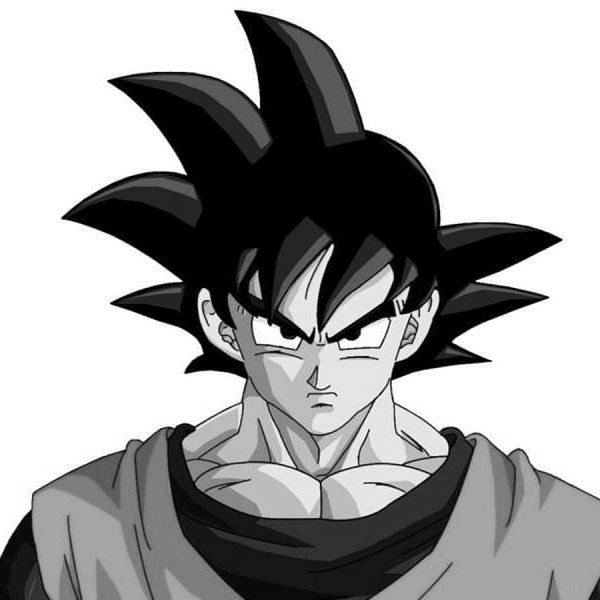

In [28]:
IPython.display.Image(filename = "./Images/original/character.png", width = 250, height = 250)

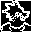

In [29]:
IPython.display.Image(filename = "./Images/result/character.png", width = 250, height = 250)

# 4. GUI

In [30]:
%%capture
for file in os.listdir("./Images/original/"):
    write_sourceMem(get_array_from_image("./Images/original/" + file))
    activate_sobel("000000000101")
    result_image_array = read_resultMem()
    data = Image.fromarray(np.uint8(result_image_array * 255) , 'L')
    data.save("./Images/result/" + os.path.splitext(file)[0] + '.png')



In [31]:
image_files = os.listdir("./Images/resized/")

image_selection = widgets.Dropdown(
                    options= image_files,
                    value = image_files[0],
                    description='Select Image:',
                    disabled=False,
                    )

thres_val_slider = widgets.IntSlider(
                        value = 0,
                        min=0,
                        max=4096,
                        step=1,
                        description='Threshold:',
                        disabled=False,
                        continuous_update=False,
                        orientation='Horizontal',
                        readout=True,
                        readout_format='d'
                    )

In [32]:
def apply_sobel(x):

    thresh_val_hex = str('{0:012b}'.format(thres_val_slider.value))
    
    write_sourceMem(get_array_from_image(selected_image_file_resized))
    activate_sobel(thresh_val_hex)
    result_image_array = read_resultMem()
    

    data = Image.fromarray(np.uint8(result_image_array * 255) , 'L')
    data.save(selected_image_file_result)
    
    display(Javascript('IPython.notebook.execute_cells_below()'))

In [38]:
selected_image_file_original = "./Images/original/" + image_selection.value
selected_image_file_resized = "./Images/resized/" + image_selection.value
selected_image_file_result = "./Images/result/" + image_selection.value

button = widgets.Button(
    description='Apply Sobel',
    disabled=False,
    button_style='', 
    tooltip='Apply Threshold',
    icon='check' 
)

file = open(selected_image_file_resized, "rb")
image = file.read()
resized_img = widgets.Image(
    value=image,
    format='png',
    width=200,
    height=200,
)

file = open(selected_image_file_result, "rb")
image = file.read()
result_img = widgets.Image(
    value=image,
    format='png',
    width=200,
    height=200,
)

box_layout1 = Layout(display='flex',
                    flex_flow='column',
                    justify_content='center',
                    align_items='flex-start',
                    width='100%')

box_layout2 = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')

items = [image_selection,thres_val_slider, button]
box1 = Box(children=items, layout=box_layout1)


items = [resized_img, result_img]
box2 = Box(children=items, layout=box_layout2)

items = [box1, box2]
box3 = Box(children=items, layout=box_layout2)
button.on_click(apply_sobel)

box3

<IPython.core.display.Javascript object>

Box(children=(Box(children=(Dropdown(description='Select Image:', index=4, options=('shapes.png', 'flower.png', 'river.png', 'character.png', 'tree.png', 'eiffel.png'), value='tree.png'), IntSlider(value=274, continuous_update=False, description='Threshold:', max=4096), Button(description='Apply Sobel', icon='check', style=ButtonStyle(), tooltip='Apply Threshold')), layout=Layout(align_items='flex-start', display='flex', flex_flow='column', justify_content='center', width='100%')), Box(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x00\x00\x00\x00V\x11%(\x00\x00\x039IDATx\x9c5\x91]h\xd5u\x18\xc7\xbf\xdf\xe7\xf7\xfc~\xe7u\x1d\xe6\xc6\x94\x86[\xae\x89\x8c\xc8\x15,Y\x81\x83%\xad\x94\xb1\x05e*^X6\x85.\xba\x88.\xecB\xac(4\n\xba\xc9\x88@\xb2\x8b\x10\xb3\x04#\xd6iE\x9b\x0e\xb3\xe1X\xb9\xadEo\xb2\xf7l\xb9\xf6f\xe7\xec\xb8\xff9\xe7\xd7\xc5\xff\xf8\xb9~x\x9e\xef\xf7\xf3\xb0\x95 @\x02\x83[;z\x04\xe2A\x10\xc1\xb3_\xcd\xc5\xbcx*\xe9K\x03-\x97\\4O\x90\x00\xb1\xf3\xdawe\r\x84@D\x0cE\x84\xe4Zb7\x84\x14B"m}\x1f.7P\x84\x14C\x11\x92\x14\x91\xf5\x8dB\x11\xca\x19\xb6\x96\x8d\xe6\x9e\xf1\xa4\x88\xf0q\x82\x00\x08\xa2<Xt\x04q\xab"\xf9m&\xdb\xde\xbd\xfd.\x10\xf2\xd8@_E\xda\x8bH\xf7\xc5\xeb\xb3q\x8a\x90e\xc7\xb8\x90jG\xfb2ED\xfa\x1ey\xf4Buo`\xf8\x84\xbb6\n!\x8dD\x1eh\xde1Ia\xad\x90TC\xb4\x06=\xb17\xb6\xae\xab\xbf\x11\xf7\x14\x80?G\xe3-Q\x86\xf5!Bj\xecI\xd3\xa8u\xc3\xf3\x7f\rl\xa3\x88\xcc7\xf7\x7f !\x145\x9e\xa0\x1f}\xdac\xe3\xc0\xcd|\x7f\xb6f\r\xee\xf20\x84%;\xdc\r\x02\x00\x81b\xb4{\xc5e\xb1\x0f\xd3\xf1\xa1\xc2.\x12D\xf2\xd4\x06\x95\xd0$\x08\x93\xdf\xf9e\xd6\x16\xb7\x1d\xcbGM\xa5\xd8\xd5\x03?\xbc\xb7\xb6\xa5\x89\xfb\x01\xfa0\x0f\xc8\xb3\xa9\xdb\xe5\xf9EWU\xdd\x94<\x91\xf3\x89\xaeO:y\xc0#<\x02\x82>\xb8P\x8c\x05\x85\xed#\xf55\xf1\xbc\x01\x0b"j\x10BO@t\xaf9\x1d\xb5\x0f%fG\x9a\x9d\x17(\xa0\xea\t\xf8;\xbe=xP>\x1d\xff-\xb1\xa0\x84\x00\x84\x185F\xadZc\xd4\x88\x185\xe6\xa3\xe5\x17\x9b\xd7k\xa47f\x8c1F\xacU\xab\xaaF\xd5X5j\x8c\xbe.\xb3\xb5\x87\xebd\x977F\x8d\xf2\xa50\xa1g\xe9\x94\xcf\x9f\x96\xcfrH\xa6\t\xd2\x13j\xc3\x84\xf0%a\xbeP76\xf6\xca\xd1\x15%\x08\x12\xa2j\xad\x1aU\xab!\xb6\xe5}w\xe4\xd0\xa6\x1e\xab\xaa\xce\xaa\x86\x1b|\xa9)\x08\\yw\xe8x\xff\xec\xb4a\xf8O5\xa4/\x15\xf4\x04\x80\xf3\x95\x9du\x7fd\xee\x8e\x86\xfe(jTmL\xads6dG\xee\xb5\xcb9I\xa9\xaaZkU\x9c3V\xfd\xb4ww\x98\xf8o\xf0\xe52Yq\xce9g#\x11uE-rb<\xa8M\x11\xf8\xa2\x93\xf8\xe5\xc1^[\xd30\x16\t_\x0c=\xb7P\xb5??22>\x95\th\x8b_\xaf\xec\xfb\xa7\xed\xa7\xa5u\xc39\xa8\x84\x19Ro\x8f\x9fL\xff\xbaI\xaeV\x05\x99\xc9\xec\xfc\xd8Q\xd6\xcc\xdc7\xd5\xbe|\xfc\xe3\xb85\xd6\xc5\xf8\xdc\xc4R\xeb9\xb9w\xe3\x9c\x1b.TOf\x82<N|>V=\x93\xd5D\xd5\x9b?~\xbf!\xc7{r\x8d\xb9\xae\xbf\x932\x98~\x15o\xddZ\x8c&n\x1e\xb9>3\x84\x8al\xf9Z\xf2\xcf\x8e+\xf5\xb2\xb9-\xf3\xd47\xb9\x86\xa1S\x873K\x13+"\xff\xc6NNm\xb1\x0f\xbb\xe4\xea\xa1\xda\x8e\xdf\xcf\x1e\x94\xfa\xd6\xfb\x9b\xd2\x9b\xdfI\xef\xcd\x9f_(\xc6\xf7\x14^X\xf57\xce\xdc^\\\xee\x9a\xeb\xa8\\\x0c.=\xff?\x07\x12\x1b\xcf\xf1\x89\x13\x0c\x00\x00\x00\x00IEND\xaeB`\x82', height='200', width='200'), Image(value=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x00\x00\x00\x00V\x11%(\x00\x00\x00\xe1IDATx\x9cu\x93K\x0e\xc4 \x0cC\x9f\xab\xde\xff\xca\x9eE>\x04\x86fQ\xa9`\x1c\xc7\x18Y\x80\xb9\x94b\xf5\xba\x87qn\xbf\xdb*E'#\x0b`\x02\x8aT`\x84\x00x6b\x15\x7fa\xe1\x91O!\xd2!\xa7\x0e5\xce\xce\x7f\xc0O\x82<4\xb4\xdc\xd6 \x94\x9bN\x91\xabJ\xa4,;\xe8\xf1R\xe1M_ (\\|\xe7\x98b\x9b\xc8F\x87\x0f\xc2%@ a\xca\xd0\xd13P\x96\xe3\xc4f5\xc8=\xa2\xf6)\x1a\xa1\xec\xdeVs\x96\xa2\x95>\x01cd8\xae\xbbtN3o\x0c\x1a\x04W\rVzv\x078g\xfdn!\xcf\xcc\xfc\x01\xce\x94\x7f\x8d\xd9\xf5\x86\xf3g\x8f\xc9\xa0\xbc\xd7\xden3\x13\xad\x99@\xe7R\xbd\x9e\x90\\\xe6\xc5\xcd;\x13\xe0&\x1c\n\xe2O\xf9\xa0\x05\xe6\xb1#\xa3ZYZ\xe1\xcfL\x8e\xb0\x16\r\xfd\x08~\xb1\xb2t\x1c\xd6\x0eRV\x00\x00\x00\x00IEND\xaeB`\x82", height='200', width='200')), layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='100%'))), layout=Layout(align_items='stretch', display='flex', flex_flow=